## Visualization and Summarization of Dataset Variables
- For this purpose we are going to plot every single feature out of data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
path = "/media/pouya/New Volume1/Master SE/Term 1/Statistical inference/Projcet/DATA/archive/Housing.csv"
df = pd.read_csv(path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Derive numerical and categorical columns in order to plot the appropriate plots 

In [3]:
numerical_df_cols = df.select_dtypes(include=['number'])
numeric_cols = numerical_df_cols.columns.tolist()
categorical_df_cols = df.select_dtypes(include=['object'])
categorical_cols = categorical_df_cols.columns.tolist()

print(categorical_cols, numeric_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


## Visualization on numerical data
 - Histograms in order to detect any particular distributions
 - Boxplots to see outliers and IQR
 - Scatter plot and correlation matrix
 - Q-Q plots

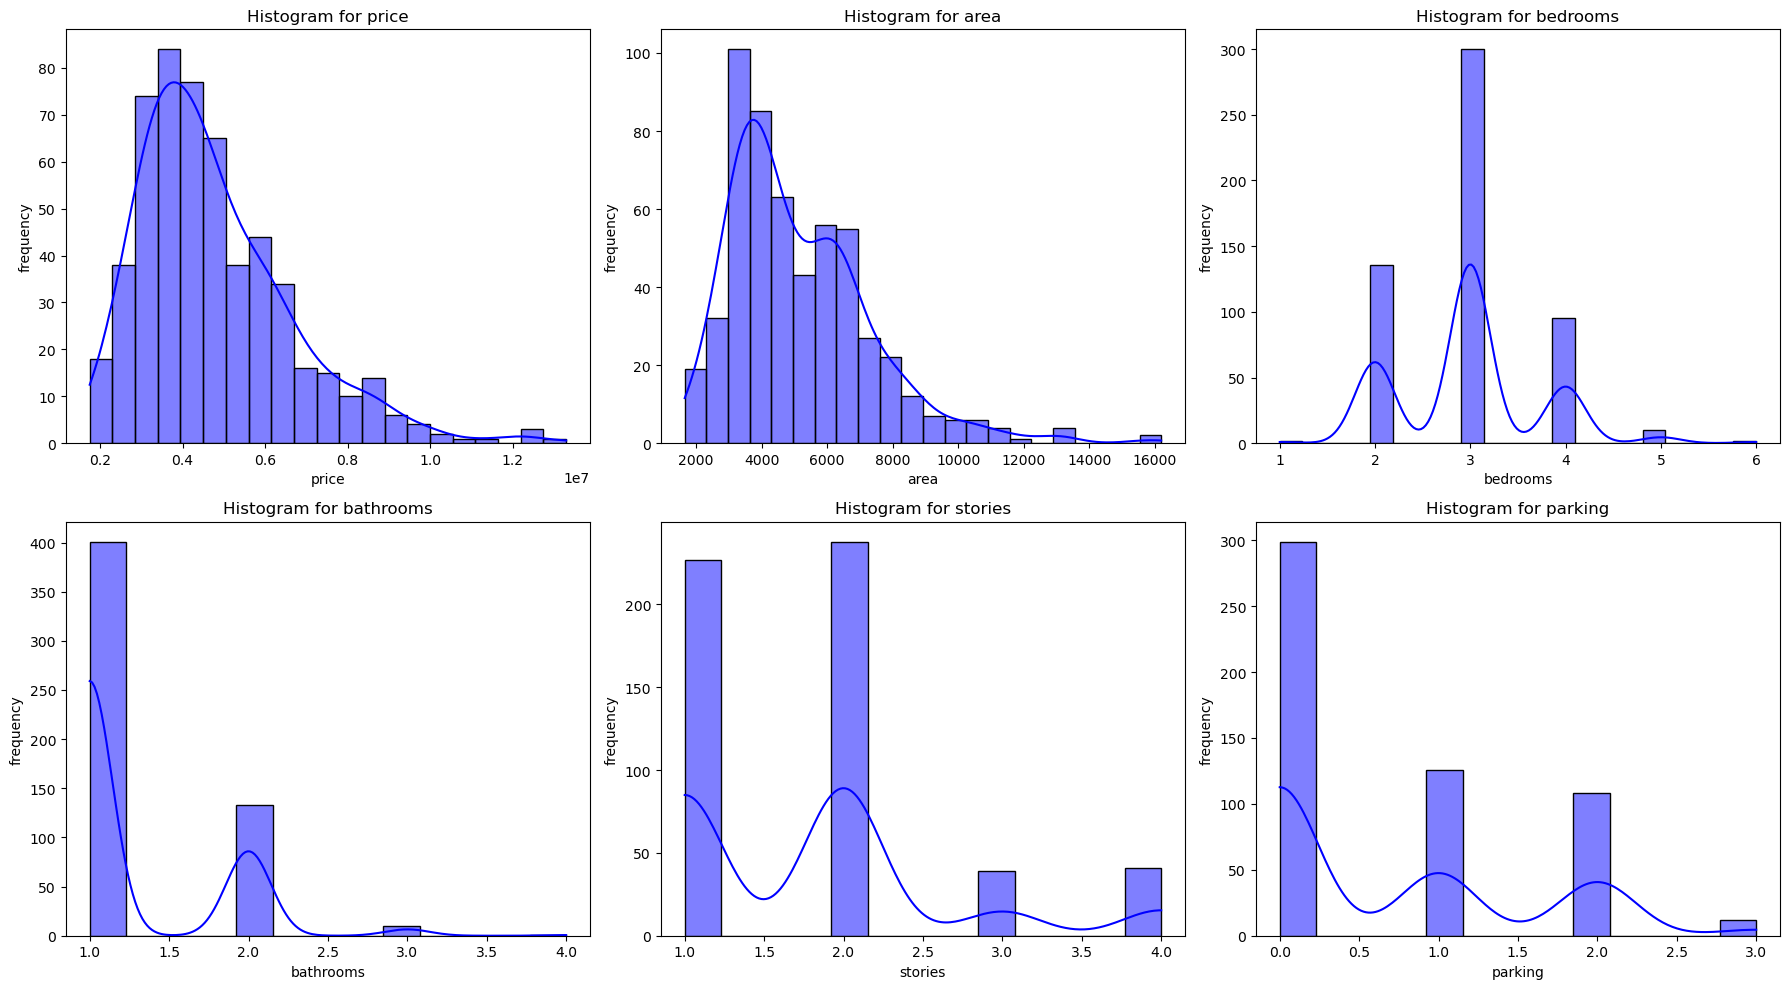

In [4]:
def plot_histogram(frist_axis, second_axis, particular_col, df, axes):
    sns.histplot(df[particular_col], kde=True, ax=axes[frist_axis, second_axis], color='blue')
    axes[frist_axis, second_axis].set_title(f'Histogram for {particular_col}')
    axes[frist_axis, second_axis].set_xlabel(f'{particular_col}')
    axes[frist_axis, second_axis].set_ylabel(f'frequency')


fig, axes = plt.subplots(2, 3, figsize= (18, 10))
which_col = 0
for i in range(2):
    for j in range(3):
        plot_histogram(i, j, numeric_cols[which_col], df, axes)
        which_col += 1
plt.tight_layout()
plt.show()

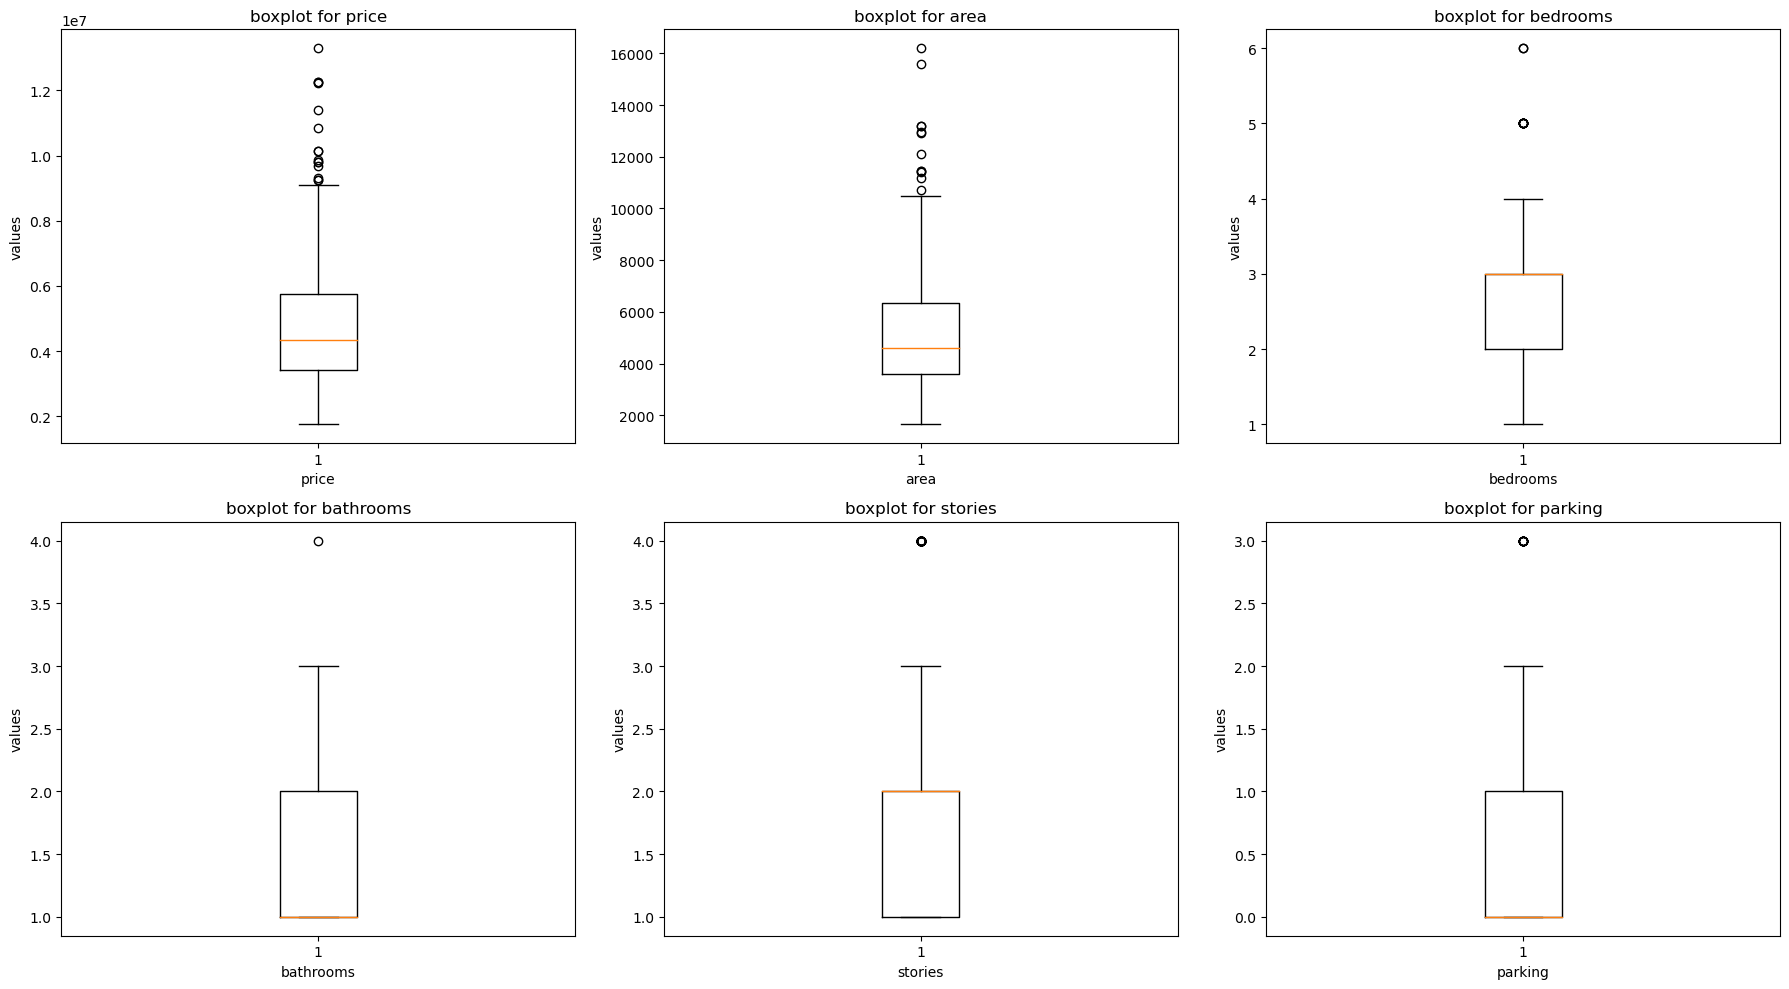

In [5]:
def plot_boxplot(frist_axis, second_axis, particular_col, df, axes):
    axes[frist_axis, second_axis].boxplot(df[particular_col])
    axes[frist_axis, second_axis].set_title(f'boxplot for {particular_col}')
    axes[frist_axis, second_axis].set_xlabel(f'{particular_col}')
    axes[frist_axis, second_axis].set_ylabel(f'values')

fig, axes = plt.subplots(2, 3, figsize= (18, 10))
which_col = 0
for i in range(2):
    for j in range(3):
        plot_boxplot(i, j, numeric_cols[which_col], df, axes)
        which_col += 1
plt.tight_layout()
plt.show()

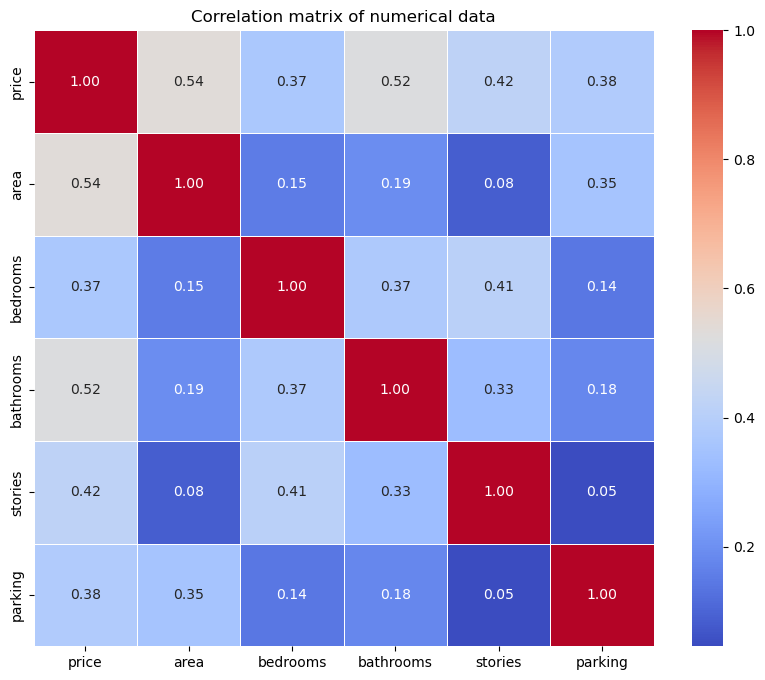

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix of numerical data')
plt.show()

/home/pouya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/pouya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/pouya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/pouya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/pouya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/pouya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py

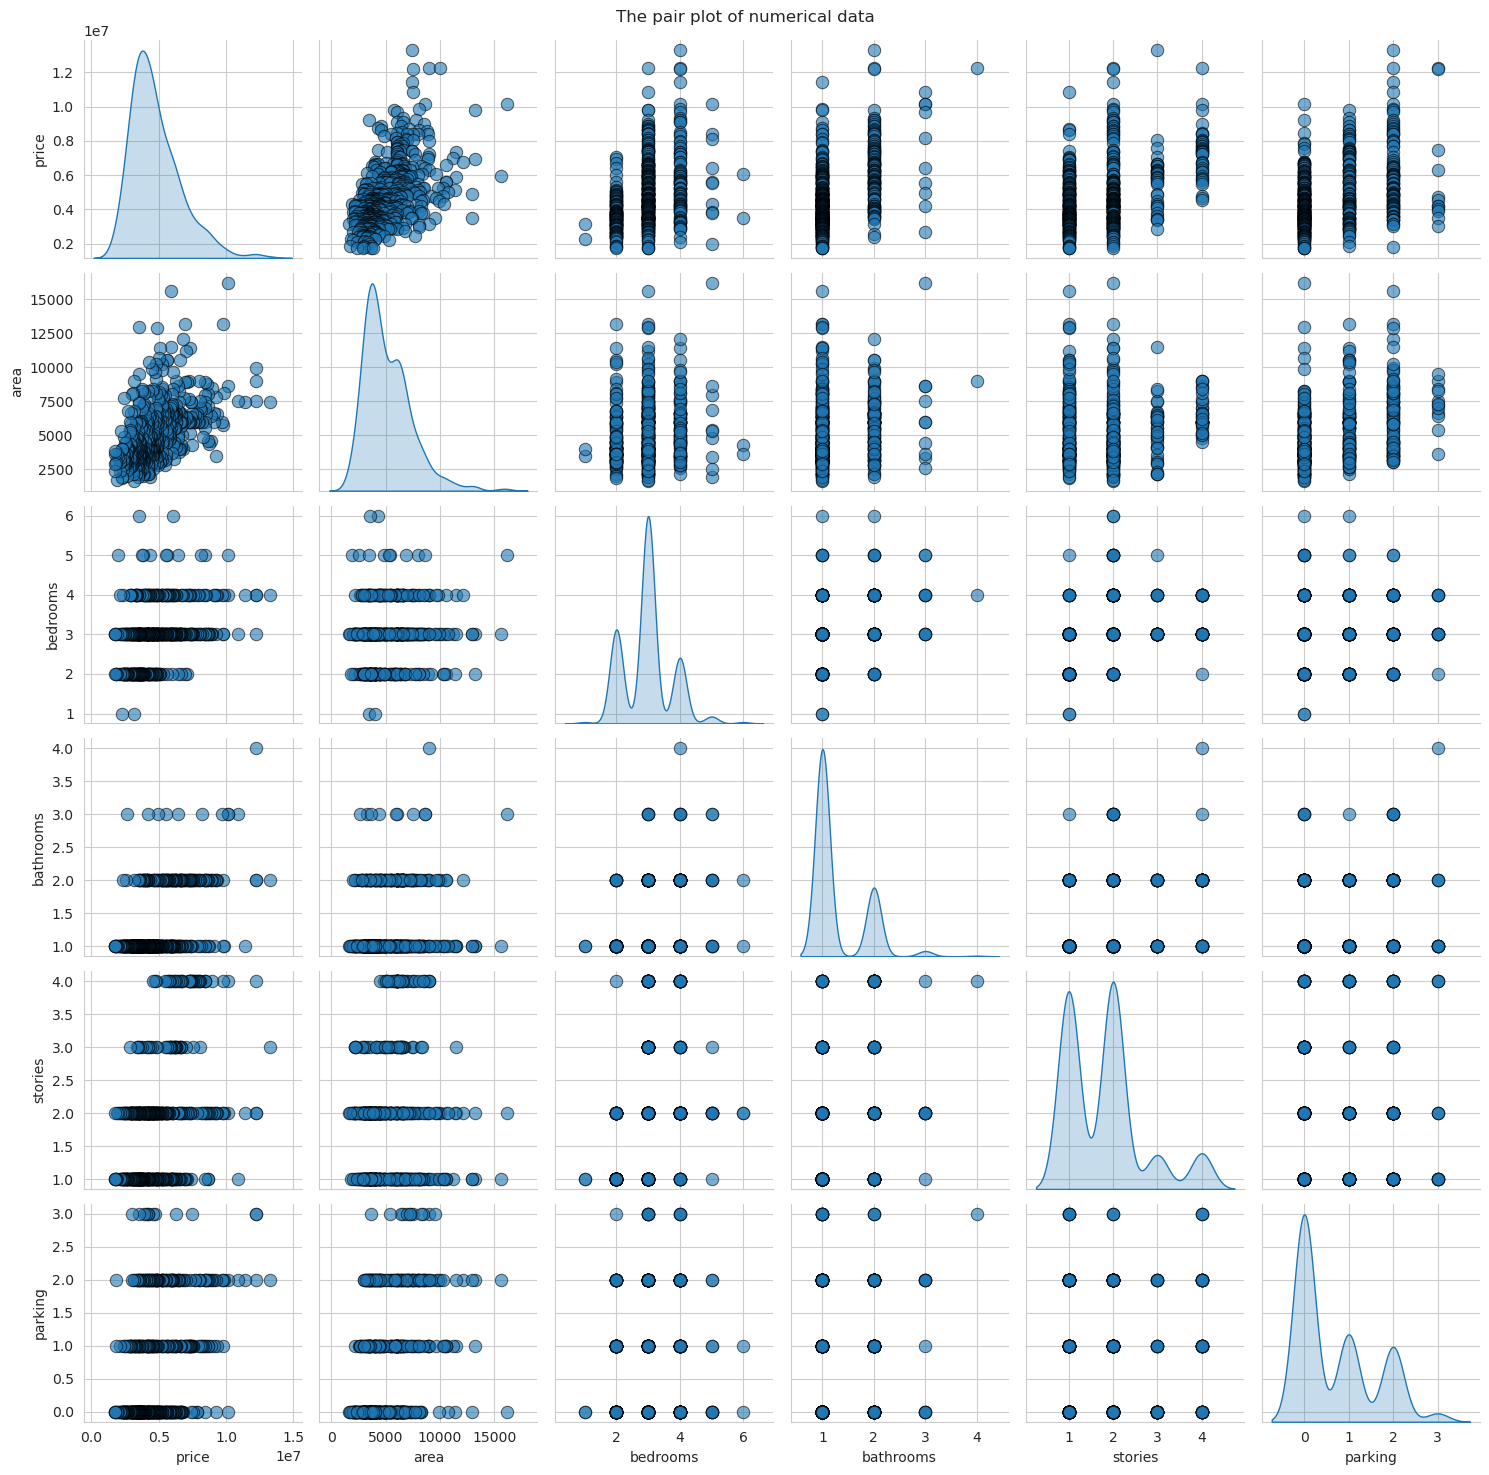

In [7]:
sns.set_style("whitegrid")
palette = sns.color_palette("muted")
pairplot = sns.pairplot(df[numeric_cols],palette=palette, diag_kind='kde',plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2.5)
pairplot.fig.suptitle("The pair plot of numerical data")
plt.tight_layout()
plt.show()


We see the potential of two data where are price and area to be more likely normal distribution therefore we can use qqplots to have a good intiution!

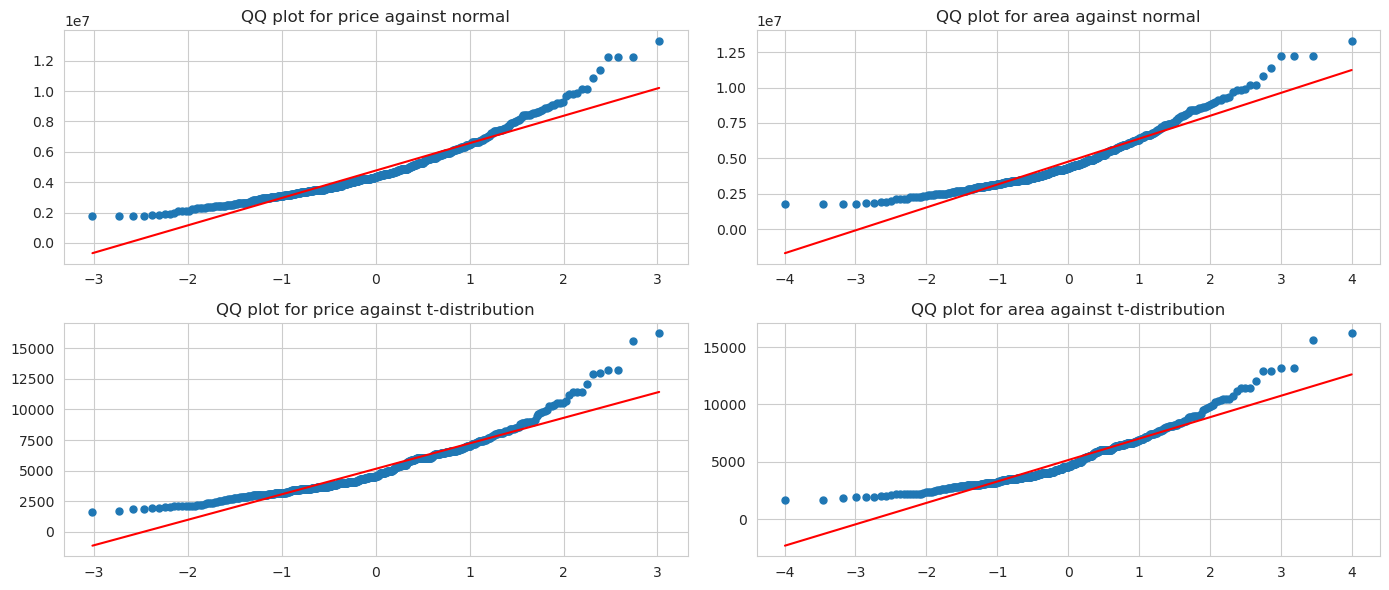

In [8]:
import statsmodels.api as sm
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
(px, py), pxy_fit = stats.probplot(df['price'], dist="norm")
axes[0, 0].plot(px, py, 'o', label='price', markersize=5)
axes[0, 0].plot(px, px * pxy_fit[0] + pxy_fit[1], 'r-')
(px, py), pxy_fit = stats.probplot(df['area'], dist="norm")
axes[1, 0].plot(px, py, 'o', label='area', markersize=5)
axes[1, 0].plot(px, px * pxy_fit[0] + pxy_fit[1], 'r-')
(px, py), pxy_fit = stats.probplot(df['area'], dist="t",sparams=(10,))
axes[1, 1].plot(px, py, 'o', label='area', markersize=5)
axes[1, 1].plot(px, px * pxy_fit[0] + pxy_fit[1], 'r-')
(px, py), pxy_fit = stats.probplot(df['price'], dist="t",sparams=(10,))
axes[0, 1].plot(px, py, 'o', label='price', markersize=5)
axes[0, 1].plot(px, px * pxy_fit[0] + pxy_fit[1], 'r-')
axes[0,0].set_title('QQ plot for price against normal')
axes[0,1].set_title('QQ plot for area against normal')
axes[1,0].set_title('QQ plot for price against t-distribution')
axes[1,1].set_title('QQ plot for area against t-distribution')
plt.tight_layout()
plt.show()

### Visualization of categorical data
-   Bar plots
-   Heatmap plots
-   Mosaic plots

#### Barplots

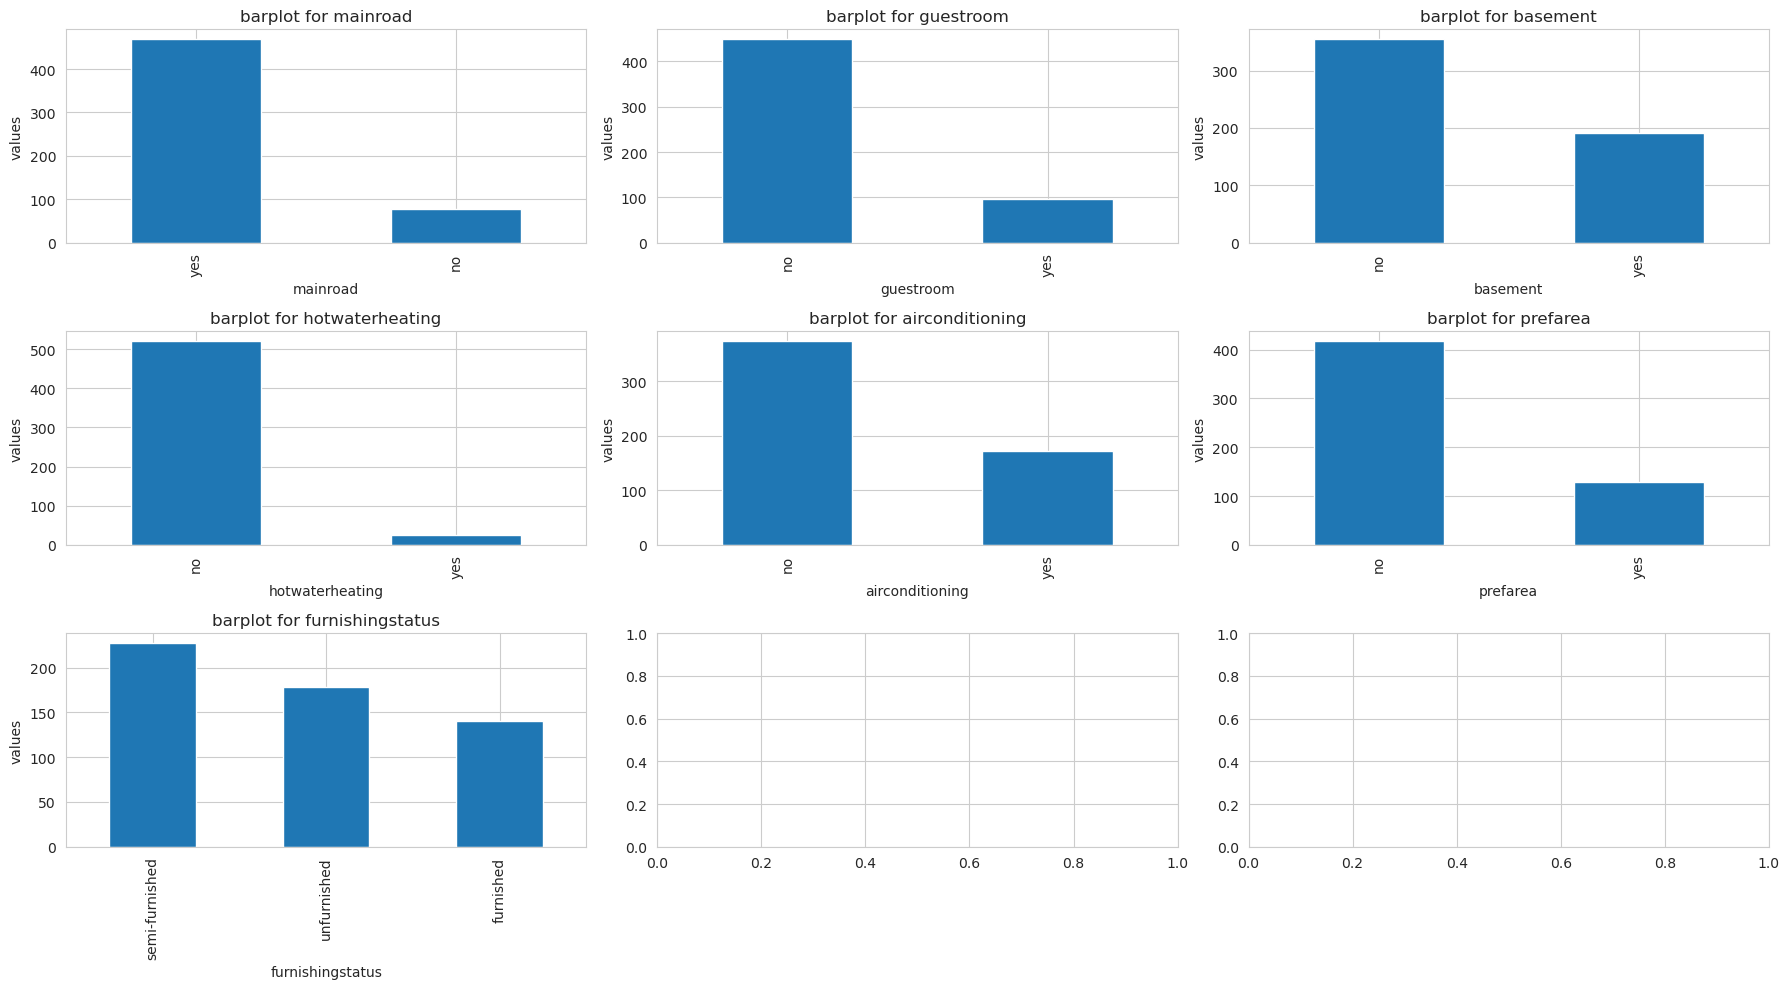

In [9]:
def bar_plot_categorical(frist_axis, second_axis, particular_col, df, axes):
    category_counts = df[particular_col].value_counts()
    category_counts.plot(kind='bar', ax = axes[frist_axis, second_axis])
    axes[frist_axis, second_axis].set_title(f'barplot for {particular_col}')
    axes[frist_axis, second_axis].set_xlabel(f'{particular_col}')
    axes[frist_axis, second_axis].set_ylabel(f'values')
fig, axes = plt.subplots(3, 3, figsize = (18, 10))
which_col = 0
for i in range(3):
    for j in range(3):
        if(which_col <= 6):
            bar_plot_categorical(i, j, categorical_cols[which_col], df, axes)
            which_col += 1

plt.tight_layout()
plt.show()


#### Heatmap plots

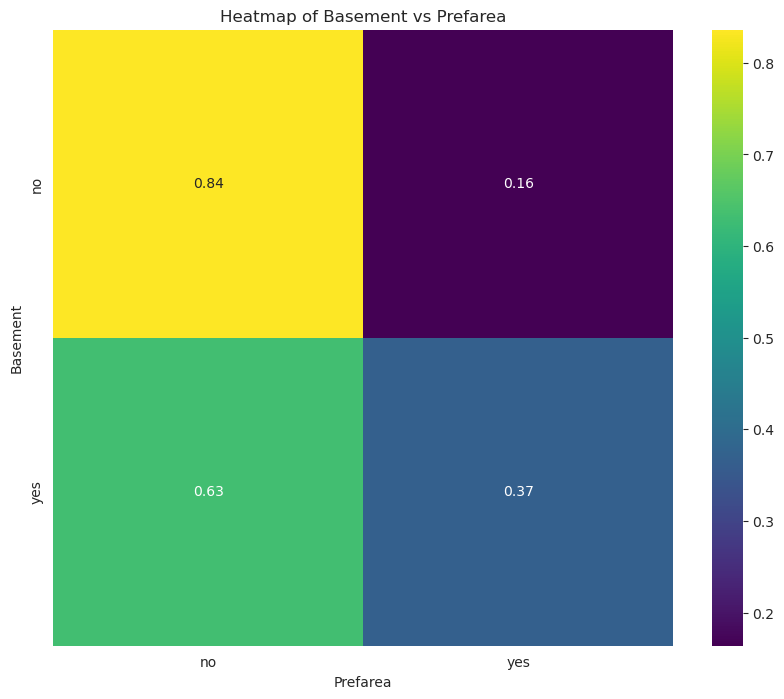

In [10]:
data_crosstab = pd.crosstab(df['basement'], df['prefarea'], normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(data_crosstab, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Basement vs Prefarea')
plt.ylabel('Basement')
plt.xlabel('Prefarea')
plt.show()

#### Mosaic plots

<Figure size 1000x800 with 0 Axes>

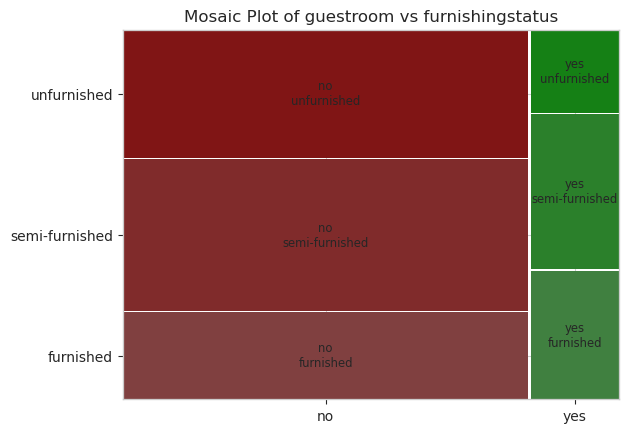

In [11]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(10, 8))
mosaic(df, ['guestroom', 'furnishingstatus'], title='Mosaic Plot of guestroom vs furnishingstatus', )
plt.show()

## Parametric Inferences and estimation
 - parametric tests:
    1. t-test
    2. mean test
    3. Sign test for median
    4. Wilcoxon test for median
 - Estimation using point estimations and maximum likelihood

If we consider to shapiro test for normalitiy we can see if our assumption is true or not.(In order to see the assumpotions are true!)

In [12]:
x = df["price"]
y = df["area"]
shapiro_statistic, p_value = stats.shapiro(x)
print(f'Shapiro test on price valuse where p-value is: {p_value}')
shapiro_statistic, p_value = stats.shapiro(y)
print(f'Shapior test on area values where p-value is: {p_value}')
shapiro_statistic, p_value = stats.shapiro(np.log(x))
print(f'Shapiro test on logarithm of price valuse where p-value is: {p_value}')
shapiro_statistic, p_value = stats.shapiro(np.log(y))
print(f'Shapior test on logarithm of area values where p-value is: {p_value}')
transformed_data, lambda_best_fit = stats.boxcox(x)
shapiro_statistic, p_value = stats.shapiro(transformed_data)
print(f'Shapiro test on boxcox tranformed price valuse where p-value is: {p_value}')
transformed_data, lambda_best_fit = stats.boxcox(y)
shapiro_statistic, p_value = stats.shapiro(transformed_data)
print(f'Shapiro test on boxcox tranformed area valuse where p-value is: {p_value}')

Shapiro test on price valuse where p-value is: 3.1544150171394466e-16
Shapior test on area values where p-value is: 2.597052316246193e-17
Shapiro test on logarithm of price valuse where p-value is: 0.21169301867485046
Shapior test on logarithm of area values where p-value is: 0.011669991537928581
Shapiro test on boxcox tranformed price valuse where p-value is: 0.5033257603645325
Shapiro test on boxcox tranformed area valuse where p-value is: 0.02812470868229866


Survey sampling in order to use t-test and z-test

In [13]:
def generating_sample(df, random_state, sample_size=200):
    return df.sample(n= sample_size, random_state=random_state, replace=True)

simple_sample = generating_sample(df, 1, 200)
simple_sample

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
235,4620000,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished
72,6720000,5020,3,1,4,yes,no,no,no,yes,0,yes,unfurnished
144,5600000,4700,4,1,2,yes,yes,yes,no,yes,1,no,furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,7455000,4300,3,2,2,yes,no,yes,no,no,1,no,unfurnished
300,4200000,4079,3,1,3,yes,no,no,no,no,0,no,semi-furnished
182,5145000,3410,3,1,2,no,no,no,no,yes,0,no,semi-furnished
256,4480000,4000,3,1,2,yes,no,no,no,no,2,no,furnished


Write funciton to use two sample t-test and z-test for means

In [14]:
def one_sample_z_test(df, col, sample_size=200):
    sample = generating_sample(df, 1, sample_size)
    return sm.stats.ztest(sample[col], value=df[col].median())

def two_sample_z_test(df, col, sample_size_1, sample_size_2):
    first_sample = generating_sample(df, 1, sample_size_1)
    second_sample = generating_sample(df, 2, sample_size_2)
    return sm.stats.ztest(first_sample[col], second_sample[col], value=0)

z_stats, p_value = sm.stats.ztest(df[df['basement'] == 'yes']['price'], df[df['basement'] == 'no']['price'], value=0)
print(F'Perform t-test for price with two sample where stats and p-value are :{z_stats}, {p_value}')
z_stats, p_value = sm.stats.ztest(df[df['basement'] == 'yes']['area'], df[df['basement'] == 'no']['area'], value=0)
print(F'Perform t-test for area with two sample where stats and p-value are :{z_stats}, {p_value}')
z_test, p_value = one_sample_z_test(df, 'price')
print(F'Perfomr mean test for price with one sample where stats and p-value are: {z_test}, {p_value}')
z_test, p_value = one_sample_z_test(df,'area')
print(f'Perfomr mean test for price with one sample where stats and p-value are: {z_test}, {p_value}')

Perform t-test for price with two sample where stats and p-value are :4.437180316396756, 9.114493979954155e-06
Perform t-test for area with two sample where stats and p-value are :1.1061719985940541, 0.2686520802379405
Perfomr mean test for price with one sample where stats and p-value are: 3.0289610377547094, 0.0024539632894213462
Perfomr mean test for price with one sample where stats and p-value are: 3.77736205098189, 0.000158498243093473


Perform MLE estimation where i believe the data(price and area) comes from normal distribution.

The estimated parameters where makes the observed data most likely: mu is 4766729.247706422 and std is 1868722.8281312082
The mean and std of observed data : 4766729.247706422, 1870439.615657394


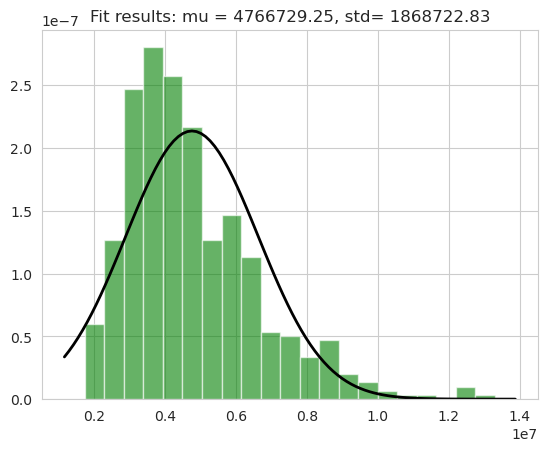

In [15]:
price_data = df['price']
mu, std = stats.norm.fit(price_data)
print(f'The estimated parameters where makes the observed data most likely: mu is {mu} and std is {std}')
print(f'The mean and std of observed data : {price_data.mean()}, {price_data.std()}')

plt.hist(price_data, bins='auto', density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Fit results: mu = {mu:.2f}, std= {std:.2f}')
plt.show()

Conduct confidence interval for fitted parameters

In [16]:
alpha = 0.05
ci_mu = stats.norm.interval(1-alpha, loc=mu, scale=std/np.sqrt(len(price_data)))
print(f'The confidence interval for mu is : {ci_mu}')
dof = len(price_data)-1
ci_std = np.sqrt(dof*std**2/stats.chi2.ppf(1-alpha/2, dof)), np.sqrt(dof*std**2/stats.chi2.ppf(alpha/2, dof)),
print(f'The confidence interval for std is: {ci_std}')

The confidence interval for mu is : (4609839.439964757, 4923619.055448086)
The confidence interval for std is: (1763979.9930692646, 1986789.9766640735)


The estimated parameters where makes the observed data most likely: mu is 5150.54128440367 and std is 2168.149153321305
The mean and std of observed data : 5150.54128440367, 2170.141022508803


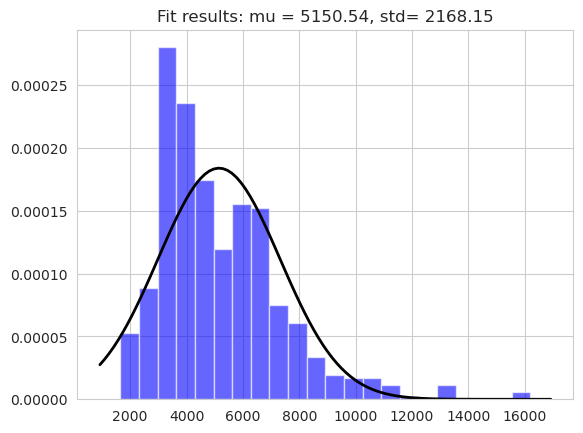

In [17]:
area_data = df['area']
mu, std = stats.norm.fit(area_data)
print(f'The estimated parameters where makes the observed data most likely: mu is {mu} and std is {std}')
print(f'The mean and std of observed data : {area_data.mean()}, {area_data.std()}')

plt.hist(area_data, bins='auto', density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Fit results: mu = {mu:.2f}, std= {std:.2f}')
plt.show()

In [18]:
alpha = 0.05
ci_mu = stats.norm.interval(1-alpha, loc=mu, scale=std/np.sqrt(len(price_data)))
print(f'The confidence interval for mu is : {ci_mu}')
dof = len(price_data)-1
ci_std = np.sqrt(dof*std**2/stats.chi2.ppf(1-alpha/2, dof)), np.sqrt(dof*std**2/stats.chi2.ppf(alpha/2, dof)),
print(f'The confidence interval for std is: {ci_std}')

The confidence interval for mu is : (4968.512950025155, 5332.569618782185)
The confidence interval for std is: (2046.6233252330742, 2305.1342558057595)


MLE for alpha (shape): 9.178406870555618
MLE for theta (scale): 511752.83398873534


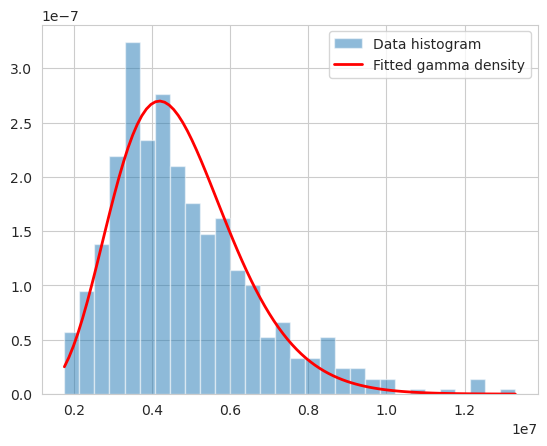

In [19]:
def neg_log_likelihood(params):
    return -np.sum(stats.gamma.logpdf(df['price'], params[0], scale=params[1]))

initial_guess = [1, 1]

result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B', bounds=((0, None), (0, None)))

alpha_mle, theta_mle = result.x

print(f'MLE for alpha (shape): {alpha_mle}')
print(f'MLE for theta (scale): {theta_mle}')

plt.hist(df['price'], bins=30, density=True, alpha=0.5, label='Data histogram')
x = np.linspace(min(df['price']), max(df['price']), 100)
plt.plot(x, stats.gamma.pdf(x, alpha_mle, scale=theta_mle), 'r-', lw=2, label='Fitted gamma density')
plt.legend()
plt.show()

### CI for alpha, theta using asyptotically and fisher information.

In [20]:
def fisher_info(params):
    alpha, theta = params
    n = len(df['price'])
    FI_alpha = n / (alpha**2)
    FI_theta = n / (theta**2)
    return np.array([[FI_alpha, 0], [0, FI_theta]])
params = result.x
se = np.sqrt(np.diag(np.linalg.inv(fisher_info(params))))
z = stats.chi2.ppf(0.975, df=1)  
conf_int = params[:, None] + np.array([-1, 1]) * z * se
print(conf_int)

[[7.20321701e+00 1.10138204e+05]
 [5.11750859e+05 6.21881860e+05]]


Bootstrap to observe the distribution the mean of area

In [21]:
B = 100000
means = np.zeros(shape=B)
for i in range(B):
    means[i] = df['area'].sample(20, replace=True).mean()

4273.09375 6168.8


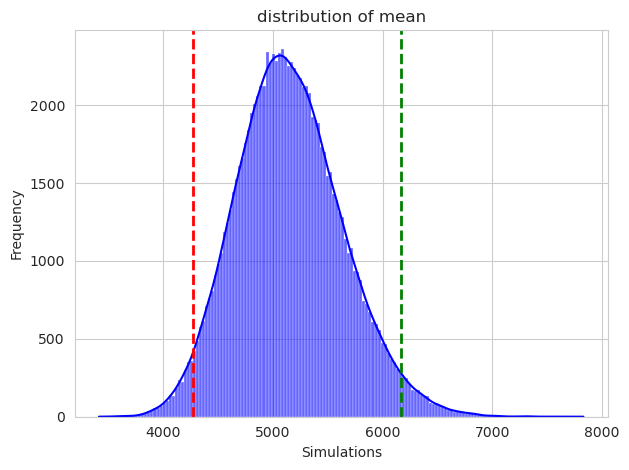

In [22]:
### CI the percentile method
ci = 95
lower_percentile = (100 - ci) / 2
upper_percentile = 100 - lower_percentile
ci_lower = np.percentile(means, lower_percentile)
ci_upper = np.percentile(means, upper_percentile)
print(ci_lower, ci_upper)
sns.histplot(means, bins='auto', kde=True, alpha=0.6, color='b')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2, label=f'2.5th percentile (CI Lower Bound)')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label=f'97.5th percentile (CI Upper Bound)')
plt.xlabel('Simulations')
plt.ylabel('Frequency')
plt.title(f'distribution of mean')
plt.tight_layout()

## Hypothesis Testing and Statistical Analysis
-   Spearman test for correlation (Non parametric test)
-   Pearson correlation test (parametric test) -> Assumptions are normality of data!
-   ANOVA test performing (parametric test) -> Assumpotions are nomrality of data!
-   The Kruskal-Wallis Test as nonparametric test for ANOVA!
-   Friedmans test for two way (non parametric) 
-   Create contingency table for price and bedrooms to see if they are independent or not (non parametric)
-   Create contingency table for bedrooms and parking to see if they are independent or not (non parametric)
-   Sign tests
-   Wilcoxon tests

Sign test for median for price

In [23]:
median_hypothesis = np.mean(df['price'])
positive_signs = np.sum(df['price'] > median_hypothesis)
negative_signs = np.sum(df['price'] < median_hypothesis)
p_value = stats.binomtest(min(positive_signs, negative_signs), positive_signs+negative_signs, 0.5)
print(f'Sign Test p-value is: {p_value}')

Sign Test p-value is: BinomTestResult(k=222, n=545, alternative='two-sided', statistic=0.4073394495412844, pvalue=1.7466750325988145e-05)


Conduct CI for median

In [24]:
sort_data = df['price'].sort_values()
CI = 0
i = 1
while(CI < 0.95):
    CI = stats.binom.cdf(len(sort_data)/2 + i, n = len(sort_data), p=0.5) - stats.binom.cdf(len(sort_data)/2 - i, n=len(sort_data), p=0.5)
    i += 1
print(CI , np.round(len(sort_data)/2 - i) , np.round(len(sort_data)/2 + i))

0.9513097077840396 248.0 296.0


Wilcoxon test for median of area

In [25]:
median_hypothesis = np.median(df['area'])
differences = df['area'] - median_hypothesis
stat, p_value = stats.wilcoxon(differences, alternative='two-sided')
print(f'The stats and p-value for wilcoxon test for median for area data: stat:{stat}, p-value: {p_value}')
## It would obvious since one of the assumptions for wilcoxon test is continus symmetric random variables

median_hypothesis = np.mean(df['area'])
positive_signs = np.sum(df['area'] > median_hypothesis)
negative_signs = np.sum(df['area'] < median_hypothesis)
p_value = stats.binomtest(min(positive_signs, negative_signs), positive_signs+negative_signs, 0.5)
print(f'Sign Test p-value is: {p_value}')

The stats and p-value for wilcoxon test for median for area data: stat:58321.5, p-value: 4.9868918908861984e-05
Sign Test p-value is: BinomTestResult(k=230, n=545, alternative='two-sided', statistic=0.42201834862385323, pvalue=0.0003124001938012276)


Conduct CI for median

In [26]:
sort_data = df['area'].sort_values()
CI = 0
i = 1
while(CI < 0.95):
    CI = stats.binom.cdf(len(sort_data)/2 + i, n = len(sort_data), p=0.5) - stats.binom.cdf(len(sort_data)/2 - i, n=len(sort_data), p=0.5)
    i += 1
print(CI , np.round(len(sort_data)/2 - i) , np.round(len(sort_data)/2 + i))

0.9513097077840396 248.0 296.0


Pearson correlation test

In [27]:
x = df['price']
y = df['area']
n = len(x)
alpha = 0.05/2

In [28]:
r_xy , p_value = stats.pearsonr(x, y)
print(f'p value of pearson test is: {p_value}')
R = ((r_xy * np.sqrt(n-2))/ np.sqrt(1-r_xy**2))
t_critical = stats.t.ppf(1-alpha, df=n-2)
print(f'R statistis: {R}')
print(f'Critical t-value: {t_critical}')
if abs(R) > t_critical:
    print("The correlation is significant")
else:
    print("The correlation is not significant")
# This must followed by normality assumptions

p value of pearson test is: 7.388225401522309e-42
R statistis: 14.794731534738283
Critical t-value: 1.9643423968425016
The correlation is significant


Spearman correlation test

In [29]:
x = df['price']
y = df['area']
corr, p_value = stats.spearmanr(x, y)
print(f'Spearman correlation coeffient is: {corr}')
print(f'Spearman p-value is: {p_value}')

Spearman correlation coeffient is: 0.602858858318821
Spearman p-value is: 3.1285544686153554e-55


ANOVA test for price
-   See if our test are sutiable and satisfy ANOVA assumptions(As wee have seen before our individual features data will not comes from normal and we can consider tranformation for them)
-   At first we are going to generate I gropus(treatments) where each gropu has J samples
-   Secondly we are going to test either they are 

### Shapiro test 

In [30]:
x = df['price']
transformed_data, lambda_best_fit = stats.boxcox(x)
shapiro_statistic, p_value = stats.shapiro(transformed_data)
print(f'Shapiro test on boxcox tranformed price valuse where p-value is: {p_value}')

Shapiro test on boxcox tranformed price valuse where p-value is: 0.5033257603645325


### Generating I groups and J samples within each group

In [31]:
unique_values = df['furnishingstatus'].unique()
groups = []
for i in range(len(unique_values)):
    groups.append(df[df['furnishingstatus'] == unique_values[i]]['price'])
    transformed_data, lambda_best_fit = stats.boxcox(groups[i])
    groups[i] = transformed_data

In [32]:
f_statistic, p_value = stats.f_oneway(groups[0], groups[1], groups[2])

print(f"F-Statistic: {f_statistic}, P-value: {p_value}")

F-Statistic: 545624.1371341922, P-value: 0.0


### Tukey method

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
all_data = np.concatenate(groups)
group_labels = []
for status in df['furnishingstatus'].unique():
    group_labels.extend([status] * len(df[df['furnishingstatus'] == status]))
tukey_df = pd.DataFrame({'price': all_data, 'group': group_labels})
tukey = pairwise_tukeyhsd(endog=tukey_df['price'], groups=tukey_df['group'], alpha=0.05)

print(tukey.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------
     furnished semi-furnished  -6.6989   0.0 -6.7171 -6.6806   True
     furnished    unfurnished  -8.0597   0.0 -8.0789 -8.0404   True
semi-furnished    unfurnished  -1.3608   0.0 -1.3779 -1.3438   True
-------------------------------------------------------------------


### Kruskal Wallis test

In [34]:
unique_values = df['furnishingstatus'].unique()
groups = []
for i in range(len(unique_values)):
    groups.append(df[df['furnishingstatus'] == unique_values[i]]['price'])

In [35]:
stat, p_value = stats.kruskal(groups[0], groups[1], groups[2])
print(f'Kruskal-Wallis test stats: {stat}')
print(f'Kruskal-Wallis test p-value: {p_value}')

Kruskal-Wallis test stats: 69.58292445963657
Kruskal-Wallis test p-value: 7.767118592501638e-16


### Dunn's test

In [36]:
import scikit_posthocs as sp
dunn_pvals = sp.posthoc_dunn(df, val_col='price', group_col='furnishingstatus', p_adjust='bonferroni')
print(dunn_pvals)

                   furnished  semi-furnished   unfurnished
furnished       1.000000e+00    1.373095e-01  3.385291e-14
semi-furnished  1.373095e-01    1.000000e+00  1.499534e-10
unfurnished     3.385291e-14    1.499534e-10  1.000000e+00


### Two way ANOVA

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df['box_price'], lambda_best_fit = stats.boxcox(df['price'])
model = ols('box_price ~ C(mainroad) + C(airconditioning) + C(mainroad):C(airconditioning)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
print(anova_table)

                                  sum_sq     df           F        PR(>F)
C(mainroad)                     0.099965    1.0   62.452983  1.537529e-14
C(airconditioning)              0.214557    1.0  134.044066  7.560201e-28
C(mainroad):C(airconditioning)  0.001940    1.0    1.212193  2.713878e-01
Residual                        0.865950  541.0         NaN           NaN


#### See the interaction plot of the main road and ariconditioning

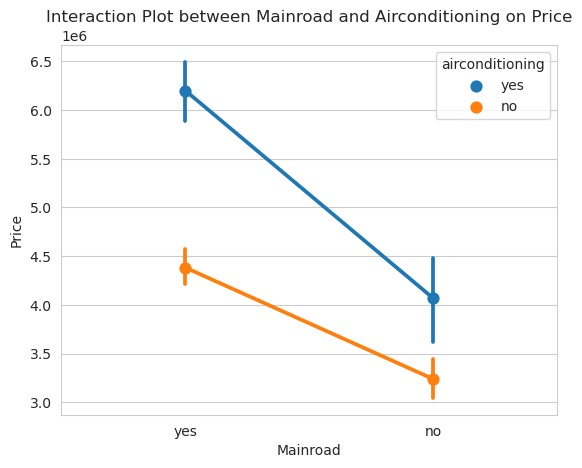

In [38]:
interaction_plot = sns.pointplot(x='mainroad', y='price', hue='airconditioning', data=df)

plt.title('Interaction Plot between Mainroad and Airconditioning on Price')
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.show()

### Contingency table between price and bedrooms!

In [39]:
price_bins = pd.qcut(df['price'], q=3, labels=['low', 'medium', 'high'])
contingency_table = pd.crosstab(price_bins, df['bedrooms'])
print(contingency_table)

bedrooms  1   2    3   4  5  6
price                         
low       2  83   83  16  1  1
medium    0  46  100  28  3  0
high      0   7  117  51  6  1


In [40]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'The chi square p-value is : {p_value}')
print(f'The chi square degrees of freedom is : {dof}')
print(f'The chi square statistic is : {chi2_stat}')

The chi square p-value is : 2.2390847243427576e-16
The chi square degrees of freedom is : 10
The chi square statistic is : 96.9296051180939


### Contingency table between stories and area

In [41]:
area_bins = pd.qcut(df['area'], q=3, labels=['low', 'medium', 'high'])
contingency_table = pd.crosstab(area_bins,df['stories'])
print(contingency_table)

stories   1   2   3   4
area                   
low      78  97   9   0
medium   69  88  12  10
high     80  53  18  31


In [42]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'The chi square p-value is : {p_value}')
print(f'The chi square degrees of freedom is : {dof}')
print(f'The chi square statistic is : {chi2_stat}')

The chi square p-value is : 7.164414640168093e-10
The chi square degrees of freedom is : 6
The chi square statistic is : 54.063015031600756


## Regression Analysis
 -  Fit regression line between area and price
 -  Plot residuals for area and price
 -  Perform KS test for area and price
 -  Transform data with boxcox and do the same procedure
 -  Bootstrap method to see the distribution of slope
 -  Conduct CI for slope
 -  Fit regression line between (bathrooms, area) and price
 -  Encode all categorical variables to numerical
 -  Fit regression model between boxcox-price and all features

### Fit regression line between area and price

In [43]:
y = df['price']
x = df['area']
x = sm.add_constant(x)
model = sm.OLS(y, x)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           7.39e-42
Time:                        16:12:01   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0

### Plot the residuals and the fitted model

Text(0, 0.5, 'Frequency')

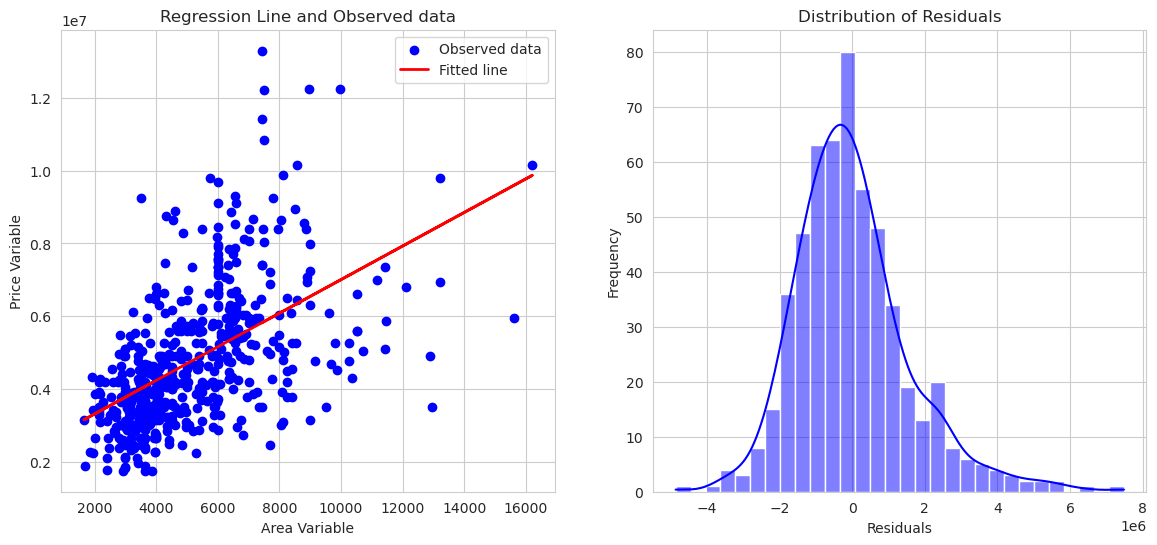

In [44]:
predictions = model.fit().predict(x)
residuals = y - predictions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].scatter(df['area'], y, color='blue', label='Observed data')
axs[0].plot(df['area'], predictions, color='red', linewidth=2, label='Fitted line')
axs[0].set_title('Regression Line and Observed data')
axs[0].set_xlabel('Area Variable')
axs[0].set_ylabel('Price Variable')
axs[0].legend()
sns.histplot(residuals, kde=True, ax=axs[1], color='blue')
axs[1].set_title('Distribution of Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

In [45]:
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

KS Statistic: 0.08431813662692267
P-value: 0.000807389239895906


#### Transform data and repeat previous parts

In [46]:
df['box_price'], best_lambda = stats.boxcox(df['price'])
df['box_area'], best_lambda = stats.boxcox(df['area'])
x = df['box_area']
y = df['box_price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              box_price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     275.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           2.30e-50
Time:                        16:12:01   Log-Likelihood:                 1002.0
No. Observations:                 545   AIC:                            -2000.
Df Residuals:                     543   BIC:                            -1991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4501      0.062     87.823      0.0

### Plot residuals and fitted model

Text(0, 0.5, 'Frequency')

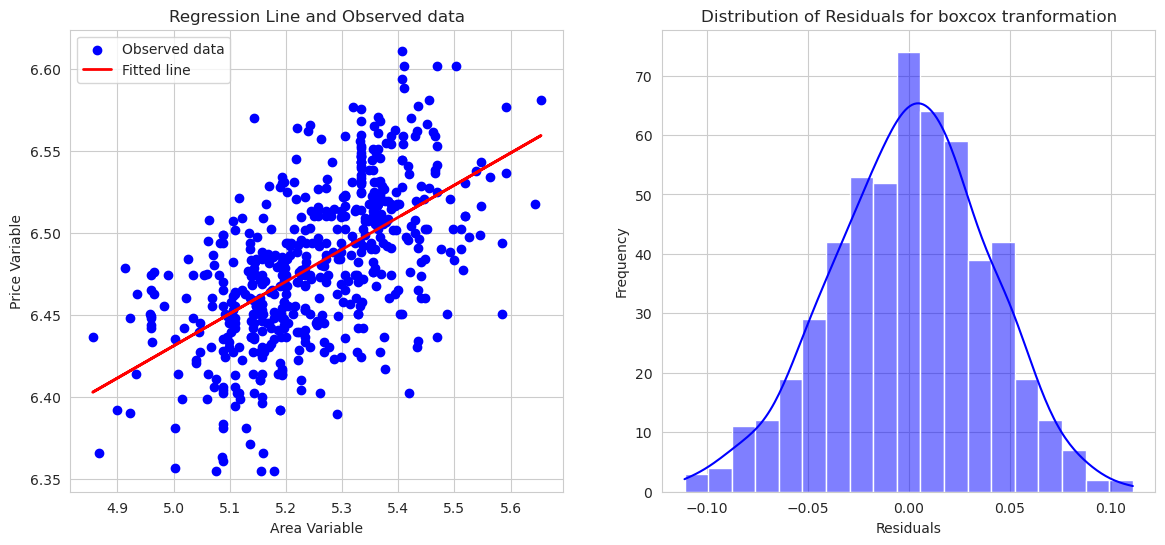

In [47]:
predictions = model.predict(x)
residuals = y - predictions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].scatter(df['box_area'], y, color='blue', label='Observed data')
axs[0].plot(df['box_area'], predictions, color='red', linewidth=2, label='Fitted line')
axs[0].set_title('Regression Line and Observed data')
axs[0].set_xlabel('Area Variable')
axs[0].set_ylabel('Price Variable')
axs[0].legend()
sns.histplot(residuals, kde=True, ax=axs[1], color='blue')
axs[1].set_title('Distribution of Residuals for boxcox tranformation')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

#### KS test

In [48]:
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

KS Statistic: 0.027576276400737343
P-value: 0.7908622855412032


### Bootstrap method to see the distribution of slope

In [49]:
B = 100000
df['box_price'], _ = stats.boxcox(df['price'])
df['box_area'], _ = stats.boxcox(df['area'])
slopes = np.zeros(shape=B)
for i in range(B):
    sample = df.sample(n=30, replace=True)
    x = sample['box_area']
    y = sample['box_price']
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    slopes[i] = model.params[1]

#### Histogram for slop

Text(0, 0.5, 'Frequency')

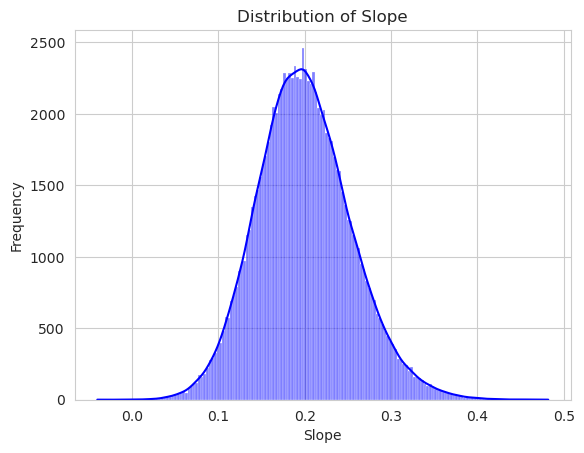

In [50]:
sns.histplot(slopes, kde=True, color='blue')
plt.title('Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')

#### Calculate from theoretical aspect(mean, std)

In [51]:
mean = np.mean(slopes)
x = df['box_area']
y = df['box_price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
residuals = y - predictions
sum_of_squares = np.sum(residuals**2)
S_xx = np.sum((df['box_area'] - df['box_area'].mean())*(df['box_price']-df['box_price'].mean()))
print(sum_of_squares)
print(S_xx)
estimate_sigma = np.sqrt(sum_of_squares / ((len(df) - 2)*S_xx))
print(f'The theoretical estimate of the standard deviation is : {estimate_sigma}')
print(f'The emprical of std: {np.std(slopes)}')

0.8073357642976755
2.0891413254387468
The theoretical estimate of the standard deviation is : 0.02667738590180805
The emprical of std: 0.05460853191817948


### Conduct "percentile interval" CI for slope

In [52]:
CI = 0.95
lower_percentile = (1 - CI) / 2 * 100
upper_percentile = (1 - (1 - CI) / 2) * 100
confidence_interval = np.percentile(slopes, [lower_percentile, upper_percentile])

print(f"The {CI}% confidence interval for the mean is: {confidence_interval}")

The 0.95% confidence interval for the mean is: [0.0986802  0.31449531]


### Fit regression line between (parking, area) and price

In [53]:
x = df[['box_area','bathrooms']]
y = df['box_price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
predictions = model.predict(x)
residuals = y - predictions

                            OLS Regression Results                            
Dep. Variable:              box_price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     243.2
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           4.07e-76
Time:                        16:13:53   Log-Likelihood:                 1064.6
No. Observations:                 545   AIC:                            -2123.
Df Residuals:                     542   BIC:                            -2110.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5397      0.056     99.133      0.0

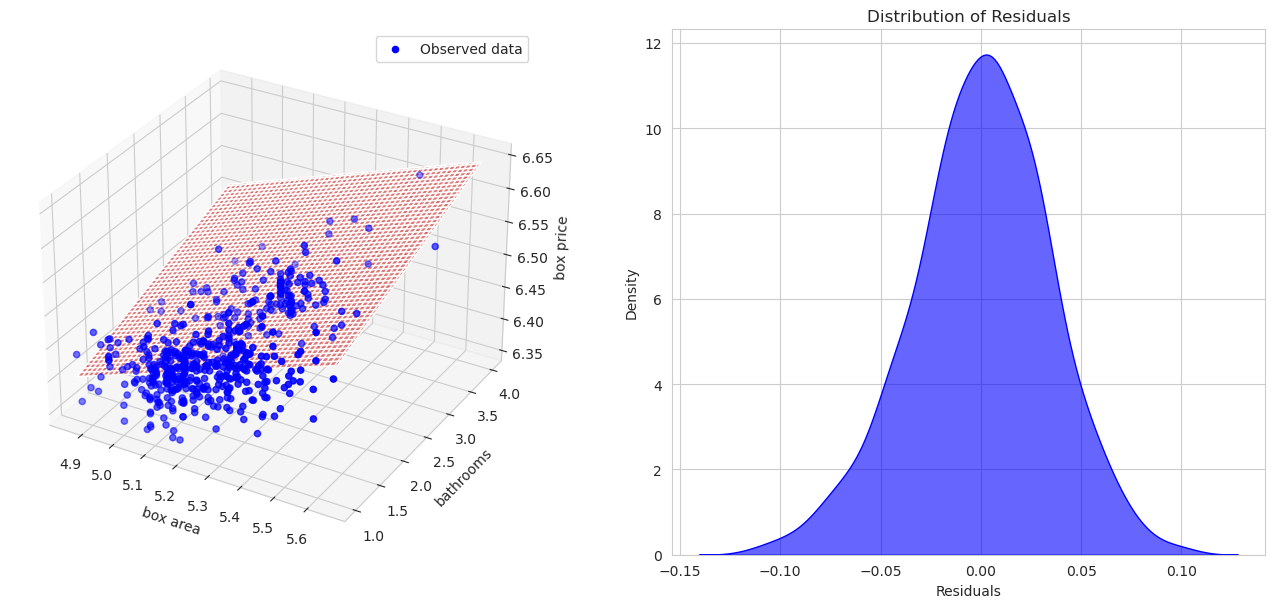

In [54]:
x_surface, y_surface = np.meshgrid(np.linspace(df['box_area'].min(), df['box_area'].max(), 100), 
                                   np.linspace(df['bathrooms'].min(), df['bathrooms'].max(), 100))

z_surface = model.params[0] + model.params[1]*x_surface + model.params[2]*y_surface
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df['box_area'], df['bathrooms'], df['box_price'], color='blue', label='Observed data')
ax1.plot_surface(x_surface, y_surface, z_surface, color='red', alpha=0.5)
ax1.set_xlabel('box area')
ax1.set_ylabel('bathrooms')
ax1.set_zlabel('box price')
ax1.legend()
ax2 = fig.add_subplot(122)
sns.kdeplot(residuals, ax=ax2, fill=True, color='blue', alpha=0.6)
ax2.set_title('Distribution of Residuals')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Density')
plt.tight_layout(pad = 4)

#### Encoding all categorical variables to numerical

In [55]:
furnished_map = {'furnished':2, 'semi-furnished':1, 'unfurnished':0}
yes_no_map = {'yes':1, 'no':0}
df['encode-furnishingstatus'] = df['furnishingstatus'].map(furnished_map)
df['encode-prefarea'] = df['prefarea'].map(yes_no_map)
df['encode-airconditioning'] = df['airconditioning'].map(yes_no_map)
df['encode-hotwaterheating'] = df['hotwaterheating'].map(yes_no_map)
df['encode-guestroom'] = df['guestroom'].map(yes_no_map)
df['encode-mainroad'] = df['mainroad'].map(yes_no_map)
df['encode-basement'] = df['basement'].map(yes_no_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,furnishingstatus,box_price,box_area,encode-furnishingstatus,encode-prefarea,encode-airconditioning,encode-hotwaterheating,encode-guestroom,encode-mainroad,encode-basement
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,furnished,6.611014,5.406139,2,1,1,0,0,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,furnished,6.601930,5.468225,2,0,1,0,0,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,semi-furnished,6.601930,5.502431,1,1,0,0,0,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,furnished,6.601612,5.409709,2,1,1,0,0,1,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,furnished,6.594002,5.406139,2,0,1,0,1,1,1


### Fit regression model between boxcox-price and all features

In [56]:
numerical_df_cols = df.select_dtypes(include=['number'])
numeric_cols = numerical_df_cols.drop(columns=['price','area','box_price']).columns.tolist()
print(numeric_cols)

['bedrooms', 'bathrooms', 'stories', 'parking', 'box_area', 'encode-furnishingstatus', 'encode-prefarea', 'encode-airconditioning', 'encode-hotwaterheating', 'encode-guestroom', 'encode-mainroad', 'encode-basement']


In [57]:
x = df[numeric_cols]
y = df['box_price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              box_price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          4.10e-129
Time:                        16:13:54   Log-Likelihood:                 1214.8
No. Observations:                 545   AIC:                            -2404.
Df Residuals:                     532   BIC:                            -2348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     